## Dataframe 데이터프레임  

- R의 dataframe 자료형에서 가져와서 패키지로 만들었음  

- 인덱스와 라벨이 붙어있는 자료를 다루기 위해 설계되었음  

- 자료 자체는 여러가지 형태와 유형 (리스트, 튜플, ndarray, 사전 객체 등)으로 주어질 수 있다.  

- 자료는 열(column)으로 구성되고 각 열은 이름을 가질 수 있다

- 다른 포맷(숫자, 문자열, 시간 정보 등)으로 된 인덱스가 존재한다.  


In [1]:
import numpy as np
import pandas as pd

series = pd.Series([10, 20, 30, 40])    # pd.Series로 시리즈 객체 생성. dataframe에서 하나의 열은 Series 객체가 됨
print(series)       # 인덱스가 차례로 숫자로 부여되고, value 값들이 출력됨. 리스트의 성분갯수가 인덱스 갯수가 됨을 알 수 있음
print(type(series)) # type이 Series 객체임

# 먼저 하나의 열만 가지는 데이터 프레임 생성
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
print(type(df))     # Series객체는 아니고 dataframe 객체임
df

# 즉, 시리즈가 1차원 벡터 데이터에 행방향 인덱스(row index)를 붙인 것이라면 
# 데이터프레임(Data-Frame) 클래스는 2차원 행렬 데이터에 인덱스를 붙인 것과 비슷하다. 
# 2차원이므로 각각의 행 데이터의 이름이 되는 행방향 인덱스(row index)뿐 아니라 각각의 열 데이터의 이름이 되는 열방향 인덱스(column index)도 붙일 수 있다.

0    10
1    20
2    30
3    40
dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


,numbers
a,10
b,20
c,30
d,40


In [2]:
print(df.index)  # 인덱스 이름
print(type(df.index))

df.index = ['A','B','C','D']    # 인덱스 이름 변경
df

Index(['a', 'b', 'c', 'd'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


,numbers
A,10
B,20
C,30
D,40


In [3]:
print(df.columns)  # 열 이름
print(type(df.columns))

df.columns = ['Num']    # 열 이름 변경
df

Index(['numbers'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


,Num
A,10
B,20
C,30
D,40


In [4]:
# 인덱스와 열이름 rename을 사용해서 변경
# key값에는 바꾸기전 이름, value값에는 바꿀 이름
df.rename(index={x:y for x,y in zip(df.index,['a','b','c','d'])}, inplace=True)
print(df)

df.rename(columns={x:y for x,y in zip(df.columns, ['numbers'])}, inplace=True)
print(df)

Num
a   10
b   20
c   30
d   40
   numbers
a       10
b       20
c       30
d       40


In [5]:
# 데이터 프레임에서 사용할 수 있는 여러가지 연산 메서드

print(df.sum())                                 # 컬럼별로 합계를 구해줌
print(df.apply(lambda x: x ** 2))               # 각 원소의 제곱
print('\n')
print(df['numbers'].map(lambda x: f'{x:0>6}'))  # 길이 6 오른쪽으로 정렬하고 남는 공간 0으로 채움
# map과 apply의 차이점은 Series객체의 경우 map으로 적용하고, dataframe의 열 별로 적용하고 싶을때는 apply를 씀. 각 요소별로는 applymap 사용
print('\n')

print(df ** 2)  # numpy에서 vectorization 한 것 같이 dataframe 객체도 벡터화 연산을 구현할 수 있다. 다만 numpy보다는 느리다.

numbers    100
dtype: int64
   numbers
a      100
b      400
c      900
d     1600


a    000010
b    000020
c    000030
d    000040
Name: numbers, dtype: object


   numbers
a      100
b      400
c      900
d     1600


In [6]:
# 데이터 프레임 객체를 확장하는 즉, 새로운 열의 정의하는 방법

df['floats'] = [1.5, 2.5, 3.5, 4.5]   # 새 열 생성
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [7]:
# 데이터 프레임에 새로운 열 정의. 이 경우에는 자동으로 인덱스에 맞추어 자료가 정렬됨
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [8]:
# 데이터프레임에 새로운 행 추가. 인덱스가 단순 정수 인덱스로 변경되는 문제점이 있으므로 자료를 직접 추가하는 것은 피해야함
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, ignore_index=True)
# print(df)

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [9]:
# 다음과 같이 적절한 인덱스 정보와 함께 dataframe 객체를 추가하는 것은 괜찮음
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75, 'names': 'Henry'}, index=['z',]))
df

,numbers,floats,names
a,10,1.50,Guido
b,20,2.50,Felix
c,30,3.50,Francesc
d,40,4.50,Yves
z,100,5.75,Henry


In [10]:
# 데이터 프레임 행 인덱싱
print(df.loc['c'])  # 인덱스 이름을 사용한 행 인덱싱
print('\n')
print(df.iloc[2])   # 인덱스 순서를 사용한 행 인덱싱
print('\n')

print(df.loc[['a', 'd']])       # 여러 개의 인덱스를 사용한 선택
print('\n')
print(df.loc[df.index[1:3]])    # 인덱스 객체를 사용한 선택
print('\n')

print(df.iloc[:])               # 인덱스번호를 사용하는 iloc에서 인덱스 전체 범위[:]를 인덱싱
print('\n')
print(df.iloc[:-1])             # iloc에서 맨 끝(-1)를 제외하고 인덱싱


numbers          30
floats          3.5
names      Francesc
Name: c, dtype: object


numbers          30
floats          3.5
names      Francesc
Name: c, dtype: object


   numbers  floats  names
a       10     1.5  Guido
d       40     4.5   Yves


   numbers  floats     names
b       20     2.5     Felix
c       30     3.5  Francesc


   numbers  floats     names
a       10    1.50     Guido
b       20    2.50     Felix
c       30    3.50  Francesc
d       40    4.50      Yves
z      100    5.75     Henry


   numbers  floats     names
a       10     1.5     Guido
b       20     2.5     Felix
c       30     3.5  Francesc
d       40     4.5      Yves


In [11]:
# 데이터 프레임 열 인덱싱
print(df['numbers'])    # 열 이름을 사용한 인덱싱. df.numbers 로도 가능
print('\n')
print(df.floats)        # 열 인덱싱
print('\n')
print(df[['numbers', 'floats']]) # 2개 이상의 열을 가져오는 방법
print('\n')

a     10
b     20
c     30
d     40
z    100
Name: numbers, dtype: int64


a    1.50
b    2.50
c    3.50
d    4.50
z    5.75
Name: floats, dtype: float64


   numbers  floats
a       10    1.50
b       20    2.50
c       30    3.50
d       40    4.50
z      100    5.75




In [12]:
# 데이터 프레임 행, 열을 동시에 인덱싱
print(df.loc['a':'c', 'numbers'])
print('\n')

print(df.loc[:, 'floats'])
print('\n')

print(df.loc[:, ['numbers','floats']])
print('\n')

print(df.loc['a':'c', 'numbers':'names'])
print('\n')

print(df.iloc[1:3, 0:2])
print('\n')

print(df.iloc[[0,1,3], [1,2]])
print('\n')

print(df.iloc[1,2])
print('\n')

print(df.iloc[::-1, 0])

a    10
b    20
c    30
Name: numbers, dtype: int64


a    1.50
b    2.50
c    3.50
d    4.50
z    5.75
Name: floats, dtype: float64


   numbers  floats
a       10    1.50
b       20    2.50
c       30    3.50
d       40    4.50
z      100    5.75


   numbers  floats     names
a       10     1.5     Guido
b       20     2.5     Felix
c       30     3.5  Francesc


   numbers  floats
b       20     2.5
c       30     3.5


   floats  names
a     1.5  Guido
b     2.5  Felix
d     4.5   Yves


Felix


z    100
d     40
c     30
b     20
a     10
Name: numbers, dtype: int64


In [13]:
# 특정 조건에 맞게 데이터프레임 행, 열 인덱싱
print(df['floats']>3)
print('\n')
print(df.loc[df['floats']>3, :])
print('\n')
df_q = df.query("floats > 3")               # df.loc말고 df.query를 쓸 수도 있음. 가독성은 좋지만 속도면에서는 손해
print(df_q)

df.loc[df['floats']>3, 'numbers']=1000
df

a    False
b    False
c     True
d     True
z     True
Name: floats, dtype: bool


   numbers  floats     names
c       30    3.50  Francesc
d       40    4.50      Yves
z      100    5.75     Henry


   numbers  floats     names
c       30    3.50  Francesc
d       40    4.50      Yves
z      100    5.75     Henry


,numbers,floats,names
a,10,1.50,Guido
b,20,2.50,Felix
c,1000,3.50,Francesc
d,1000,4.50,Yves
z,1000,5.75,Henry


In [14]:
# 기존 df에 새로운 열 추가할 때 기존 df의 인덱스 구조와 동일해야지 열이 추가가 됨.
# join은 좀 더 유연하게 추가할 수 있는 메서드

df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
# 인덱스 값이 y인 자료는 기존 df에 없으므로 제거됐고, z 인 자료는 없어서 nan이라는 값을 가짐


,numbers,floats,names,squares
a,10,1.50,Guido,1.0
b,20,2.50,Felix,4.0
c,1000,3.50,Francesc,9.0
d,1000,4.50,Yves,16.0
z,1000,5.75,Henry,NaN


In [15]:
# 기존 인덱스에 해당하는 값과 추가되는 새로운 인덱스 값을 모두 보존하고 싶다면 다른방식의 join 메서드를 사용해야함
# how = 'outer' 옵션 추가

df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')

,numbers,floats,names,squares
a,10.0,1.50,Guido,1.0
b,20.0,2.50,Felix,4.0
c,1000.0,3.50,Francesc,9.0
d,1000.0,4.50,Yves,16.0
y,NaN,NaN,NaN,25.0
z,1000.0,5.75,Henry,NaN


In [16]:
# how='inner' - inner는 두 인덱스의 교집합을 사용함
# how='left' - left는 호출한 객체의 인덱스 즉, df.join에서 df의 인덱스를 사용함
# how='right' - right는 조인되는 새로운 객체의 인덱스를 사용함

df=df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='inner')

In [17]:
# 데이터 프레임의 값을 보고 싶을때
print(df.values)
print(type(df.values))      # df.values는 내용이 numpy.ndarray형태로 저장됨을 알 수 있음
print('\n')

print(df[['numbers', 'squares']].mean())   # 데이터프레임 mean메서드를 쓰는데 문자열 자료들도 있으므로 특정 열 인덱싱해서 써야함 
print(df[['numbers', 'squares']].std())    # 마찬가지

[[10 1.5 'Guido' 1]
 [20 2.5 'Felix' 4]
 [1000 3.5 'Francesc' 9]
 [1000 4.5 'Yves' 16]]
<class 'numpy.ndarray'>


numbers    507.5
squares      7.5
dtype: float64
numbers    568.704669
squares      6.557439
dtype: float64


## Dataframe을 이용하여 시계열 자료를 다뤄보자

In [18]:
# 9개의 행과 4개의 열을 가진 행렬 형태로 표준정규분포 난수를 생성한다.
np.random.seed(0)
a = np.random.standard_normal((9, 4))
a.round(6)

# 이 행렬을 바로 데이터 프레임으로 생성한다. 인덱스와 열은 수만큼 자동으로 생성된다.
# a에 들어갈 데이터의 형태는 ndarray/dict/list/series/dataframe 형태이다.
df = pd.DataFrame(a)
df

,0,1,2,3
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349


In [19]:
# 열 이름 지정. 열 개수와 같은 길이의 문자열 리스트 할당. 
headers=['No1', 'No2', 'No3', 'No4']
df.columns = headers
df

,No1,No2,No3,No4
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349


In [20]:
print(df['No2'].iloc[3])  # 열인덱싱을 먼저 하고 행을 인덱싱하면 특정한 자료에 접근할 수 있음. 옛날에는 df['No2'][3] 이것도 됐는데 이젠x

0.12167501649282841


- 시계열 자료는 인덱스가 날짜 혹은 시간인 데이터를 말한다. pandas에서 시계열 자료를 생성하려면 인덱스를 DatatimeIndex 자료형으로 만든다.

- DatetimeIndex는 특정한 순간에 기록된 타임스탬프(timestamp) 형식의 시계열 자료를 다루기 위한 인덱스이다.

- 시간 인덱스를 추가해보자. pandas의 data_range 메서드를 사용하면 DatatimeIndex라는 객체를 생성할 수 있다.

- 더 다양한 사용법은 여기 참고 https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/

In [21]:
# 2015-1-1을 시작일로 월말기준으로 9개의 자료를 생성한다. (월말기준 일자로 9개 각 달의 마지막 날 생성)
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

# dtype을 보면 datetime64로 각 데이터는 앞에서 배운 datetime 자료형임을 알 수 있다. 

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [22]:
# 앞서 정의한 난수 데이터프레임에 datetime 자료형을 가진 DatetimeIndex 객체를 인덱스로 지정해준다.
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,1.764052,0.400157,0.978738,2.240893
2015-02-28,1.867558,-0.977278,0.950088,-0.151357
2015-03-31,-0.103219,0.410599,0.144044,1.454274
2015-04-30,0.761038,0.121675,0.443863,0.333674
2015-05-31,1.494079,-0.205158,0.313068,-0.854096
2015-06-30,-2.552990,0.653619,0.864436,-0.742165
2015-07-31,2.269755,-1.454366,0.045759,-0.187184
2015-08-31,1.532779,1.469359,0.154947,0.378163
2015-09-30,-0.887786,-1.980796,-0.347912,0.156349


In [23]:
# 앞서 언급한 다양한 데이터프레임 메서드를 사용할 수 있다. 
# 합 : df.sum(), 평균: df.mean(), 누적 합: df.cumsum() ....은 모두 같은 열에 있는 행데이터끼리 계산하게 됨. 즉 axis=0 개념
print(df.sum())
print('\n')
print(df.cumsum())

# 원소곱 : df.prod() (ex. 이산수익률(기하평균수익률) 계산할때 쓰임 ), 누적 곱 : df.cumprod()
print(df.prod(axis=0))
print(df.prod(axis=1))      # 의미는 없음. axis를 어떻게 사용하는지만 한번 볼 것. 앞의 sum, cumsum도 axis 지정 가능
print('\n')
print(df.cumprod(axis=0))

No1    6.145267
No2   -1.562190
No3    3.547031
No4    2.628551
dtype: float64


                 No1       No2       No3       No4
2015-01-31  1.764052  0.400157  0.978738  2.240893
2015-02-28  3.631610 -0.577121  1.928826  2.089536
2015-03-31  3.528391 -0.166522  2.072870  3.543809
2015-04-30  4.289429 -0.044847  2.516733  3.877484
2015-05-31  5.783508 -0.250005  2.829801  3.023388
2015-06-30  3.230518  0.403613  3.694237  2.281223
2015-07-31  5.500273 -1.050752  3.739996  2.094039
2015-08-31  7.033052  0.418606  3.894943  2.472202
2015-09-30  6.145267 -1.562190  3.547031  2.628551
No1   -3.048879
No2    0.011090
No3   -0.000040
No4    0.001155
dtype: float64
2015-01-31    1.548209
2015-02-28    0.262458
2015-03-31   -0.008878
2015-04-30    0.013714
2015-05-31    0.081961
2015-06-30    1.070550
2015-07-31    0.028274
2015-08-31    0.131969
2015-09-30   -0.095656
Freq: M, dtype: float64


                 No1       No2       No3       No4
2015-01-31  1.764052  0.400157  0.978738  2.24

In [24]:
# 연산이 가능한 숫자를 가진 열을 뽑아내고, 그 칼럼들에 대해 기본통계량(총 갯수, 평균, 표준편차, 최솟값, 최댓값, 퍼센타일) 출력
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.682807,-0.173577,0.394115,0.292061
std,1.582437,1.100823,0.457279,0.999115
min,-2.552990,-1.980796,-0.347912,-0.854096
25%,-0.103219,-0.977278,0.144044,-0.187184
50%,1.494079,0.121675,0.313068,0.156349
75%,1.764052,0.410599,0.864436,0.378163
max,2.269755,1.469359,0.978738,2.240893


In [25]:
# 그 이외 자주 쓰이는 통계 계산 데이터프레임 메서드들. nan 값이 존재하면 안됨. 결측치가 존재한다면 전처리 필요
# 상관계수. 이 때 상관계수는 피어슨 상관계수 공식에 의해 계산된다.
# 피어슨 상관계수는(Pearson correlation coefficient) 두 변수 간의 관련성을 구하기 위해 보편적으로 이용함
# 참고 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

# 모든 열 간의 상관계수 계산
print(df.corr())
print('\n')

# 특정 열간의 상관계수는 df['No1'].corr(df['No2']) 와 같은 식으로 계산 가능
print(df['No1'].corr(df['No2']))
print('\n')

# 공분산
# 모든 열 간의 공분산 계산
print(df.cov())
print('\n')

No1       No2       No3       No4
No1  1.000000 -0.090979  0.054063  0.206672
No2 -0.090979  1.000000  0.383166  0.266734
No3  0.054063  0.383166  1.000000  0.125245
No4  0.206672  0.266734  0.125245  1.000000


-0.09097852931594731


          No1       No2       No3       No4
No1  2.504105 -0.158483  0.039120  0.326756
No2 -0.158483  1.211811  0.192879  0.293366
No3  0.039120  0.192879  0.209104  0.057221
No4  0.326756  0.293366  0.057221  0.998230




In [26]:
# 반대로 데이터프레임을 행렬로 바꿀 수 있다. 
np.array(df).round(6)

array([[ 1.764052,  0.400157,  0.978738,  2.240893],
       [ 1.867558, -0.977278,  0.950088, -0.151357],
       [-0.103219,  0.410599,  0.144044,  1.454274],
       [ 0.761038,  0.121675,  0.443863,  0.333674],
       [ 1.494079, -0.205158,  0.313068, -0.854096],
       [-2.55299 ,  0.653619,  0.864436, -0.742165],
       [ 2.269755, -1.454366,  0.045759, -0.187184],
       [ 1.532779,  1.469359,  0.154947,  0.378163],
       [-0.887786, -1.980796, -0.347912,  0.156349]])

In [27]:
# 데이터프레임 원소에 numpy 메서드를 이용한 계산 적용. 
# 생각해야 할 건 속도측면에서 빠른 계산이 요구될 때 이런 계산이 필요하면 항상 행렬꼴로 계산을 먼저하고 데이터프레임형태에 최종적으로 저장하는 것이 권장됨

sqrt_df=np.sqrt(df)
sqrt_df

,No1,No2,No3,No4
2015-01-31,1.328176,0.632580,0.989312,1.496961
2015-02-28,1.366586,NaN,0.974725,NaN
2015-03-31,NaN,0.640780,0.379531,1.205933
2015-04-30,0.872375,0.348819,0.666231,0.577646
2015-05-31,1.222325,NaN,0.559525,NaN
2015-06-30,NaN,0.808467,0.929751,NaN
2015-07-31,1.506570,NaN,0.213912,NaN
2015-08-31,1.238055,1.212171,0.393634,0.614949
2015-09-30,NaN,NaN,NaN,0.395410


In [28]:
# 결측치 전처리 방식

# 결측치 존재 여부 확인
print(sqrt_df.isnull())
print(sqrt_df.isnull().sum())

# 컬럼마다 결측치 비율
print(sqrt_df.isnull().sum()/df.shape[0])

# df.drop은 df.drop(['row name']) 을 통해 삭제가능함. 열을 지우고 싶은 경우 df.drop(['column name'], axis=1) 로 지정. 여러개 지우기 가능

# 결측값 있는 행 제거 (axis=0 이 default)
df_drop_row = sqrt_df.dropna()
print(df_drop_row)
print('\n')

# 결측값 있는 열 제거
df_drop_column = sqrt_df.dropna(axis=1)
print(df_drop_column)
print('\n')

# df.dropna(how='all', axis=0) 특정 행의 모든 값이 nan이면 행 삭제
# df.dropna(thresh=2)          행에서 nan이 2개이상이면 삭제
# df.dropna(how='all', axis=1) 특정 열의 모든 값이 nan이면 열 삭제
# df.dropna(how='any')         특정 행에서 nan 값이 하나라도 있으면 삭제. dropna()와 같음


No1    No2    No3    No4
2015-01-31  False  False  False  False
2015-02-28  False   True  False   True
2015-03-31   True  False  False  False
2015-04-30  False  False  False  False
2015-05-31  False   True  False   True
2015-06-30   True  False  False   True
2015-07-31  False   True  False   True
2015-08-31  False  False  False  False
2015-09-30   True   True   True  False
No1    3
No2    4
No3    1
No4    4
dtype: int64
No1    0.333333
No2    0.444444
No3    0.111111
No4    0.444444
dtype: float64
                 No1       No2       No3       No4
2015-01-31  1.328176  0.632580  0.989312  1.496961
2015-04-30  0.872375  0.348819  0.666231  0.577646
2015-08-31  1.238055  1.212171  0.393634  0.614949


Empty DataFrame
Columns: []
Index: [2015-01-31 00:00:00, 2015-02-28 00:00:00, 2015-03-31 00:00:00, 2015-04-30 00:00:00, 2015-05-31 00:00:00, 2015-06-30 00:00:00, 2015-07-31 00:00:00, 2015-08-31 00:00:00, 2015-09-30 00:00:00]




In [29]:
# 결측값 채우기
df_fill_row_value = sqrt_df.fillna(value=0)        # nan을 전부 value=0 으로 채움
df_fill_row_bfill = sqrt_df.fillna(method='bfill') # 뒷값으로 채움 (뒤에서 나올 데이터를 앞에서 미리씀)
df_fill_row_ffill = sqrt_df.fillna(method='ffill') # 앞값으로 채움 (앞에서 나온 데이터를 뒤에 씀)

print(df_fill_row_value)
print('\n')
print(df_fill_row_bfill)
print('\n')
print(df_fill_row_ffill)
print('\n')

No1       No2       No3       No4
2015-01-31  1.328176  0.632580  0.989312  1.496961
2015-02-28  1.366586  0.000000  0.974725  0.000000
2015-03-31  0.000000  0.640780  0.379531  1.205933
2015-04-30  0.872375  0.348819  0.666231  0.577646
2015-05-31  1.222325  0.000000  0.559525  0.000000
2015-06-30  0.000000  0.808467  0.929751  0.000000
2015-07-31  1.506570  0.000000  0.213912  0.000000
2015-08-31  1.238055  1.212171  0.393634  0.614949
2015-09-30  0.000000  0.000000  0.000000  0.395410


                 No1       No2       No3       No4
2015-01-31  1.328176  0.632580  0.989312  1.496961
2015-02-28  1.366586  0.640780  0.974725  1.205933
2015-03-31  0.872375  0.640780  0.379531  1.205933
2015-04-30  0.872375  0.348819  0.666231  0.577646
2015-05-31  1.222325  0.808467  0.559525  0.614949
2015-06-30  1.506570  0.808467  0.929751  0.614949
2015-07-31  1.506570  1.212171  0.213912  0.614949
2015-08-31  1.238055  1.212171  0.393634  0.614949
2015-09-30       NaN       NaN       NaN  0.39

In [30]:
# 단 결측치가 존재하더라도 처리가능한 메서드들이 있다. (df.corr, df.cov 같은건 안됨))
# 결측치를 없다고 가정하고 계산하는 것.
print(sqrt_df)
print(sqrt_df.sum())

# 만약 결측치도 고려해서 계산하고 싶다면 skipna=False 와 같은 옵션을 주면 됨
print(sqrt_df.sum(skipna=False))

No1       No2       No3       No4
2015-01-31  1.328176  0.632580  0.989312  1.496961
2015-02-28  1.366586       NaN  0.974725       NaN
2015-03-31       NaN  0.640780  0.379531  1.205933
2015-04-30  0.872375  0.348819  0.666231  0.577646
2015-05-31  1.222325       NaN  0.559525       NaN
2015-06-30       NaN  0.808467  0.929751       NaN
2015-07-31  1.506570       NaN  0.213912       NaN
2015-08-31  1.238055  1.212171  0.393634  0.614949
2015-09-30       NaN       NaN       NaN  0.395410
No1    7.534088
No2    3.642817
No3    5.106619
No4    4.290899
dtype: float64
No1   NaN
No2   NaN
No3   NaN
No4   NaN
dtype: float64


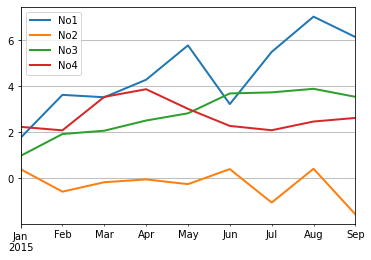

In [31]:
# 따로 시각화 메서드를 사용할 필요 없이 바로 판다스에서 제공하는 시각화 메서드를 사용 가능하다.

%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Text(0, 0.5, 'value')

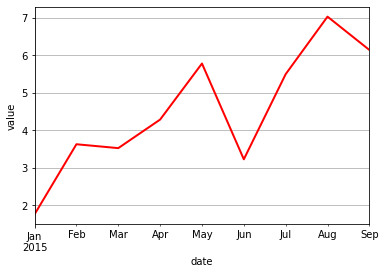

In [32]:
# 데이터 프레임에서 하나의 열을 인덱싱 하면 Series 객체가 된다.
print(type(df))
print(type(df['No1']))

# 데이터 프레임의 주요 메서드는 Series 객체에도 사용할 수 있다.
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')

In [33]:
# SQL의 그룹 지정 MS excel의 피봇 테이블과 유사한 기능인 groupby를 알아보자
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,1.764052,0.400157,0.978738,2.240893,Q1
2015-02-28,1.867558,-0.977278,0.950088,-0.151357,Q1
2015-03-31,-0.103219,0.410599,0.144044,1.454274,Q1
2015-04-30,0.761038,0.121675,0.443863,0.333674,Q2
2015-05-31,1.494079,-0.205158,0.313068,-0.854096,Q2
2015-06-30,-2.552990,0.653619,0.864436,-0.742165,Q2
2015-07-31,2.269755,-1.454366,0.045759,-0.187184,Q3
2015-08-31,1.532779,1.469359,0.154947,0.378163,Q3
2015-09-30,-0.887786,-1.980796,-0.347912,0.156349,Q3


In [34]:
# Quarter 열을 기준으로 groupby 연산을 해서 각 그룹에 대해 통계를 구할 수 있음
groups = df.groupby('Quarter')
print(groups.mean())
print('\n')
print(groups.max())
print('\n')
print(groups.size())

No1       No2       No3       No4
Quarter                                        
Q1       1.176130 -0.055507  0.690957  1.181270
Q2      -0.099291  0.190045  0.540456 -0.420862
Q3       0.971583 -0.655268 -0.049069  0.115776


              No1       No2       No3       No4
Quarter                                        
Q1       1.867558  0.410599  0.978738  2.240893
Q2       1.494079  0.653619  0.864436  0.333674
Q3       2.269755  1.469359  0.154947  0.378163


Quarter
Q1    3
Q2    3
Q3    3
dtype: int64


In [35]:
# 그룹 지정은 여러 개의 열을 기준으로 할 수도 있음
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']
groups = df.groupby(['Quarter', 'Odd_Even'])
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even      1.867558 -0.977278  0.950088 -0.151357
        Odd       0.830417  0.405378  0.561391  1.847583
Q2      Even     -0.895976  0.387647  0.654150 -0.204245
        Odd       1.494079 -0.205158  0.313068 -0.854096
Q3      Even      1.532779  1.469359  0.154947  0.378163
        Odd       0.690984 -1.717581 -0.151077 -0.015417

In [36]:
# transpose 해서 보기. df.T, df.transpose
groups.mean().T

Quarter         Q1                  Q2                  Q3          
Odd_Even      Even       Odd      Even       Odd      Even       Odd
No1       1.867558  0.830417 -0.895976  1.494079  1.532779  0.690984
No2      -0.977278  0.405378  0.387647 -0.205158  1.469359 -1.717581
No3       0.950088  0.561391  0.654150  0.313068  0.154947 -0.151077
No4      -0.151357  1.847583 -0.204245 -0.854096  0.378163 -0.015417

## 2개 이상의 데이터프레임 병합

In [37]:
# 앞서 df.join에서 맛보기 했음. 이번에는 데이터 병합(merge), 연결(concatenate)를 사용해보자

# 데이터프레임은 이렇게 딕셔너리를 이용해서 정의할 수도 있다.
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])

df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])

print(df1)
print('\n')
print(df2)


고객번호   이름
0  1001   둘리
1  1002  도우너
2  1003   또치
3  1004   길동
4  1005   희동
5  1006  마이콜
6  1007   영희


   고객번호      금액
0  1001   10000
1  1001   20000
2  1005   15000
3  1006    5000
4  1008  100000
5  1001   30000


In [38]:
# merge 명령으로 위의 두 데이터프레임 df1, df2를 합치면 공통 열인 고객번호를 기준으로 데이터를 찾아서 합침
# 기본 모드는 양쪽 데이터프레임에 모두 키가 존재하는 데이터만 보여주는 inner join 방식
print(pd.merge(df1, df2))
print('\n')

# 키 값이 한쪽에만 있어도 데이터를 보여주는 outer join 방식. left, right 방식도 join의 left, right와 동일
print(pd.merge(df1, df2, how='outer'))
print('\n')

print(pd.merge(df1, df2, how='left'))
print('\n')

print(pd.merge(df1, df2, how='right'))
print('\n')

# 더 자세한 기능은 참고 https://datascienceschool.net/view-notebook/7002e92653434bc88c8c026c3449d27b/


고객번호   이름     금액
0  1001   둘리  10000
1  1001   둘리  20000
2  1001   둘리  30000
3  1005   희동  15000
4  1006  마이콜   5000


   고객번호   이름        금액
0  1001   둘리   10000.0
1  1001   둘리   20000.0
2  1001   둘리   30000.0
3  1002  도우너       NaN
4  1003   또치       NaN
5  1004   길동       NaN
6  1005   희동   15000.0
7  1006  마이콜    5000.0
8  1007   영희       NaN
9  1008  NaN  100000.0


   고객번호   이름       금액
0  1001   둘리  10000.0
1  1001   둘리  20000.0
2  1001   둘리  30000.0
3  1002  도우너      NaN
4  1003   또치      NaN
5  1004   길동      NaN
6  1005   희동  15000.0
7  1006  마이콜   5000.0
8  1007   영희      NaN


   고객번호   이름      금액
0  1001   둘리   10000
1  1001   둘리   20000
2  1001   둘리   30000
3  1005   희동   15000
4  1006  마이콜    5000
5  1008  NaN  100000




In [39]:
# concat 명령어를 사용하면 기준 열(key column)을 사용하지 않고 단순히 데이터를 연결(concatenate)함.
print(pd.concat([df1, df2]))
print('\n')
# 옆으로 데이터를 연결
print(pd.concat([df1, df2], axis=1))



고객번호   이름        금액
0  1001   둘리       NaN
1  1002  도우너       NaN
2  1003   또치       NaN
3  1004   길동       NaN
4  1005   희동       NaN
5  1006  마이콜       NaN
6  1007   영희       NaN
0  1001  NaN   10000.0
1  1001  NaN   20000.0
2  1005  NaN   15000.0
3  1006  NaN    5000.0
4  1008  NaN  100000.0
5  1001  NaN   30000.0


   고객번호   이름    고객번호        금액
0  1001   둘리  1001.0   10000.0
1  1002  도우너  1001.0   20000.0
2  1003   또치  1005.0   15000.0
3  1004   길동  1006.0    5000.0
4  1005   희동  1008.0  100000.0
5  1006  마이콜  1001.0   30000.0
6  1007   영희     NaN       NaN


In [40]:
# 실제 주가 데이터를 이용해보자.
# tiger 200 etf 야후에서 가져온 ohlcv 데이터

# pandas 출력하는 옵션 조절하는 것
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

# 일반적으로 df.head(n), df.tail(n) 으로 출력보고 싶은 만큼 n개 지정해서 앞쪽, 뒤쪽 데이터 확인

import pandas as pd

df = pd.read_csv('102110.csv')
print(df.head(10))
print(df.tail(10))


Date          High           Low          Open         Close  \
0  2008-04-07  20098.353529  19874.746192  19931.744141  19931.744141   
1  2008-04-08  19905.441254  19703.756167  19708.140625  19708.140625   
2  2008-04-10  19738.828125  19497.682957  19738.828125  19738.828125   
3  2008-04-11  20054.513058  19857.212426  20045.744141  20045.744141   
4  2008-04-14  19756.369072  19602.913031  19616.066406  19616.066406   
5  2008-04-15  19769.522227  19580.990523  19668.679688  19668.679688   
6  2008-04-16  19918.596962  19756.371981  19852.830078  19852.830078   
7  2008-04-17  20124.660577  19962.435644  20019.433594  20019.433594   
8  2008-04-18  20019.442369  19848.448446  19949.291016  19949.291016   
9  2008-04-21  20260.577200  20190.425883  20247.423828  20247.423828   

     Volume  
0   15858.0  
1    2431.0  
2  110067.0  
3   43156.0  
4    5809.0  
5   15341.0  
6   21014.0  
7    1186.0  
8   16744.0  
9    4777.0  
            Date     High      Low     Open    Clos

In [41]:
# 인덱스 확인
print(df.index)

# 인덱스가 datetime 형식이 아니므로 datetime 형식으로 바꿔준다.
# (1) 이렇게 Date열의 문자열의 원소를 하나씩 접근하여, datetime 형식으로 바꿔주는 방식이 있다.
# for i in range(len(df)):
#     df.iloc[i,0]=datetime.datetime.strptime(str(df.iloc[i,0]),'%Y-%m-%d')
# 인덱스 재설정
# df.set_index('Date',inplace=True)

# (2) 손쉽게 pd.to_datetime 메서드를 쓰는 방식이 있다. 날짜를 각 원소가 datetime 자료형을 가지는 DatetimeIndex 객체로 바꾸어 준다.
# df.index=pd.to_datetime(df['Date'])
# print(df.index)

# (3) 위의 2가지 과정 보다 더 쉬운 방법이 있다... 애초에 read_csv에 다음과 같이 옵션을 주면 된다.
# read_csv 에서 시계열 데이터를 파싱하는 다양한 방법은 여기 참고 https://rfriend.tistory.com/536
df = pd.read_csv('102110.csv',index_col=0, parse_dates=True)
print(df.index)

RangeIndex(start=0, stop=2985, step=1)
DatetimeIndex(['2008-04-07', '2008-04-08', '2008-04-10', '2008-04-11',
               '2008-04-14', '2008-04-15', '2008-04-16', '2008-04-17',
               '2008-04-18', '2008-04-21',
               ...
               '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-25'],
              dtype='datetime64[ns]', name='Date', length=2985, freq=None)


In [42]:
# 월말 기준이 되는 지점 찾기
import datetime

s = pd.Series(np.arange(df.shape[0]), index=df.index)
print(s.head(10))

# np.arange와 np.linspace는 모두 시작점과 끝점사이의 간격에서 원하는 step의 크기만큼 일정하게 떨어져 있는 숫자들을 array로 형태로 반환해 주는 함수. 차이점은 arange은 끝점 미포함, linspace는 끝점 포함

# 시계열 데이터 리샘플링. (구간이 커지는 (일->달) 다운샘플링임) 각 달의 마지막날을 갖고옴
# 참고 : https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/
end_month = s.resample("1M").max()
print(end_month.index)

# 월말 기준 데이터 ohlcv 출력
print(df.iloc[end_month].head(10))

Date
2008-04-07    0
2008-04-08    1
2008-04-10    2
2008-04-11    3
2008-04-14    4
2008-04-15    5
2008-04-16    6
2008-04-17    7
2008-04-18    8
2008-04-21    9
dtype: int32
DatetimeIndex(['2008-04-30', '2008-05-31', '2008-06-30', '2008-07-31',
               '2008-08-31', '2008-09-30', '2008-10-31', '2008-11-30',
               '2008-12-31', '2009-01-31',
               ...
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31'],
              dtype='datetime64[ns]', name='Date', length=146, freq='M')
                    High           Low          Open         Close    Volume
Date                                                                        
2008-04-30  20615.728749  20361.430096  20563.115234  20563.115234    9484.0
2008-05-30  20756.025391  20650.798392  20756.025391  20756.025391   10077.0
2008-06-30  19642.371094  18818.093021  19642.37109

### dataframe cell의 style 즉 색을 변경해 줄 수도 있다.

- 참고 : https://pbpython.com/styling-pandas.html